In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from IPython.display import SVG, display

##### Define ChEMBL and Papyrus versions

In [3]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [4]:
annotation_round = 2

##### Define output directory

In [5]:
from mutants_in_pcm import data_path
data_path.data_dir = '../data'

In [6]:
from utils import get_mutant_analysis_path
data_dir = '1_mutant_statistics'

In [7]:
family_analysis_dir = get_mutant_analysis_path(data_dir, 'family', annotation_round)

##### Import analysis functions

In [8]:
from mutants_in_pcm.preprocessing import merge_chembl_papyrus_mutants
from mutants_in_pcm.annotation import chembl_annotation
from mutants_in_pcm.mutant_analysis_family import (obtain_chembl_family,group_families,
                                                   link_bioactivity_to_family,
                                                   plot_circular_barplot_families,
                                                   plot_circular_barplot_families_newannotations)

Obtain family level annotations from ChEMBL

In [9]:
chembl_families = obtain_chembl_family(chembl_version)
chembl_families

,accession,l1,l2,l3,l4,l5
0,Q8HZ64,Membrane receptor,Family A G protein-coupled receptor,Small molecule receptor (family A GPCR),Monoamine receptor,Trace amine receptor
1,P50282,Enzyme,Protease,Metallo protease,Metallo protease MAM clan,Metallo protease M10A subfamily
2,P26664,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family
3,P51675,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,CC chemokine receptor
4,O15528,Enzyme,Cytochrome P450,Cytochrome P450 family 27,Cytochrome P450 family 27B,Cytochrome P450 27B1
...,...,...,...,...,...,...
10841,Q6V0L0,NaN,NaN,NaN,NaN,NaN
10842,Q6NT55,NaN,NaN,NaN,NaN,NaN
10843,Q4G0S4,NaN,NaN,NaN,NaN,NaN
10844,P09688,NaN,NaN,NaN,NaN,NaN


In [10]:
# Group smaller families in bigger families to avoid cluttering the plot
chembl_families = group_families(chembl_families)
chembl_families

,accession,l1,l2,l3,l4,l5
0,Q8HZ64,Membrane receptor,GPCR,Small molecule receptor (family A GPCR),Monoamine receptor,Trace amine receptor
1,P50282,Enzyme,Protease,Metallo protease,Metallo protease MAM clan,Metallo protease M10A subfamily
2,P26664,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family
3,P51675,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Chemokine receptor,CC chemokine receptor
4,O15528,Enzyme,Cytochrome P450,Cytochrome P450 family 27,Cytochrome P450 family 27B,Cytochrome P450 27B1
...,...,...,...,...,...,...
10841,Q6V0L0,Other,Other,Other,Other,Other
10842,Q6NT55,Other,Other,Other,Other,Other
10843,Q4G0S4,Other,Other,Other,Other,Other
10844,P09688,Other,Other,Other,Other,Other


### Analysis of mutant data availability per family
#### ChEMBL + Papyrus, at least one variant defined

Read and annotate bioactivity data

In [11]:
# Read annotated bioactivity data with mutants (ChEMBL + Papyrus, at least one variant defined per target)
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)
# Add family annotations
annotated_data_families = link_bioactivity_to_family(annotated_data, chembl_families)
annotated_data_families

,target_id,connectivity,pchembl_value_Mean,Activity_class_consensus,source,SMILES,CID,accession,sequence,Year,UniProtID,Organism,HGNC_symbol,l1,l2,l3,l4,l5
0,A0A045ISB3_F161S,ALIJNJWQOZKBPP,5.07,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
1,A0A045ISB3_F161S,CXXIUJZSLPZZIM,5.27,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,CHEMBL4647367,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
2,A0A045ISB3_F161S,IPTNWUSXZLVWFT,5.04,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,CHEMBL4638011,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
3,A0A045ISB3_F161S,LUVQLVJTOZVLDB,5.13,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,CHEMBL4637373,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
4,A0A045ISB3_I203A,ALIJNJWQOZKBPP,7.37,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455834,Q9YQ12_WT,ZYLARFCKPNSSDA,6.17,"Series([], dtype: object)",ChEMBL31,CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...,CHEMBL3331342,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
455835,Q9YQ12_WT,ZYLFWZWRSRMGBQ,10.10,"Series([], dtype: object)",ChEMBL31,Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...,CHEMBL2296983,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2013.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
455836,Q9YQ12_WT,ZZCUJLFFPCGLAL,5.51,"Series([], dtype: object)",ChEMBL31,CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...,CHEMBL4530451,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2019.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
455837,Q9YQ12_WT,ZZGMOZUZSAJAML,6.26,"Series([], dtype: object)",ChEMBL31,CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...,CHEMBL3115161,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily


Plot circular barplots for family levels of interest

                      activity_mut  activity_all  mut_ratio
l1                                                         
Enzyme                       20759        266328   0.077945
Epigenetic regulator          1105         21244   0.052015
Ion channel                    245         17036   0.014381
Membrane receptor             1730         96037   0.018014
Other                          590         11432   0.051610
Secreted protein                23           212   0.108491
Transcription factor           458         23975   0.019103
Transporter                    176         19575   0.008991


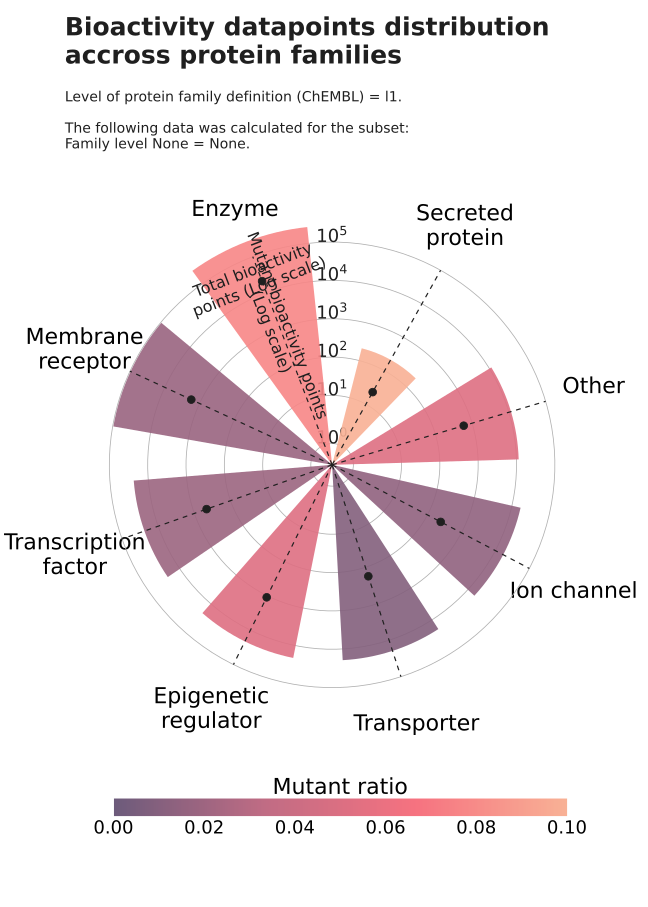

                      activity_mut  activity_all  mut_ratio
l1                                                         
Enzyme                       20759        266328   0.077945
Epigenetic regulator          1105         21244   0.052015
Ion channel                    245         17036   0.014381
Membrane receptor             1730         96037   0.018014
Other                          590         11432   0.051610
Secreted protein                23           212   0.108491
Transcription factor           458         23975   0.019103
Transporter                    176         19575   0.008991


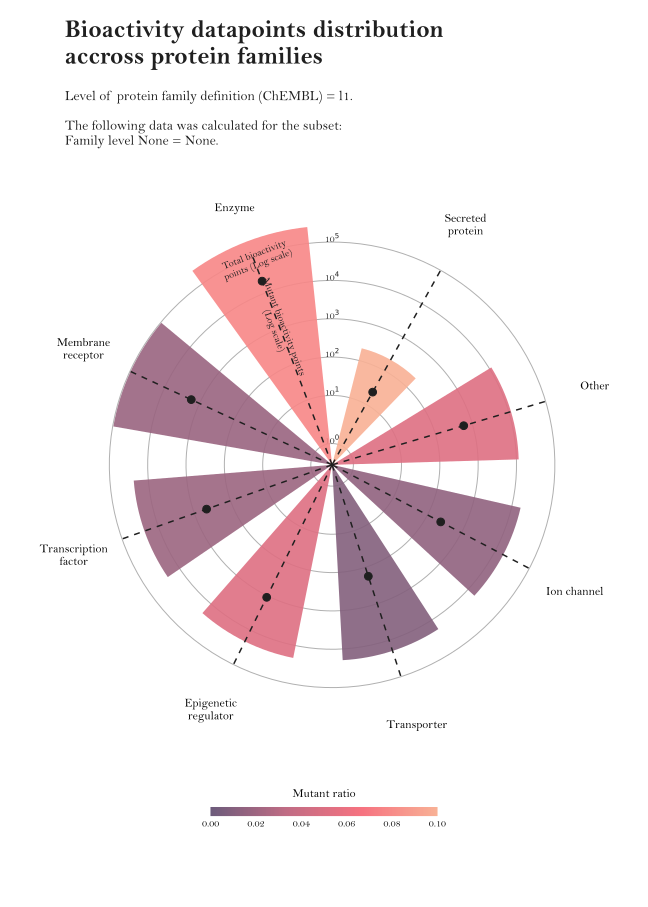

In [12]:
for figure_panel in [True, False]:
    figpath = plot_circular_barplot_families(annotated_data_families, 'l1', family_analysis_dir, subset_level=None, subset_family=None,
                                             save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                             activity_mut  activity_all  mut_ratio
l2                                                                
Cytochrome P450                         4            23   0.173913
Electrochemical transporter           162          9574   0.016921
Eraser                                 42         14553   0.002886
GPCR                                 1730         96037   0.018014
Hydrolase                            3209         16267   0.197271
Kinase                              12243        134048   0.091333
Ligand-gated ion channel               73          4410   0.016553
Lyase                                  48          7237   0.006633
Nuclear receptor                      359         14359   0.025002
Other                                2096         50645   0.041386
Oxidoreductase                       2884         32352   0.089144
Phosphatase                            67          5135   0.013048
Phosphodiesterase                      52         10385   0.00

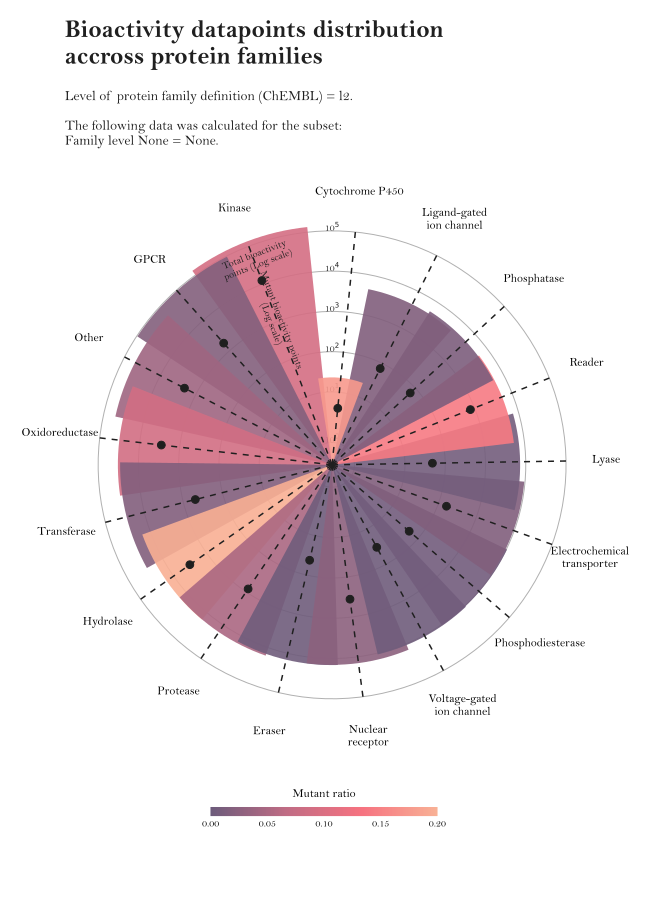

In [13]:
figpath = plot_circular_barplot_families(annotated_data_families, 'l2', family_analysis_dir, subset_level=None, subset_family=None,
                                         save=True)
display(SVG(data=figpath))

                               activity_mut  activity_all  mut_ratio
l4                                                                  
AGC protein kinase group               1385         10570   0.131031
Atypical protein kinase group            80          4888   0.016367
CAMK protein kinase group                 3           186   0.016129
CK1 protein kinase group                  8            42   0.190476
CMGC protein kinase group                24         18749   0.001280
Other protein kinase group              146          9161   0.015937
STE protein kinase group                 28          1073   0.026095
TK protein kinase group                5925         76095   0.077863
TKL protein kinase group               4644         13284   0.349593


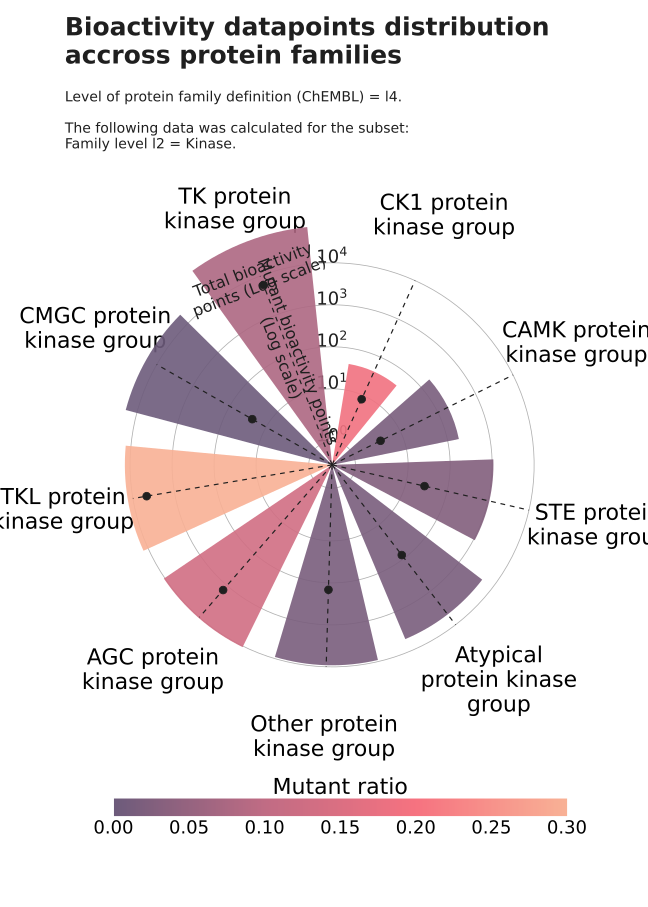

                               activity_mut  activity_all  mut_ratio
l4                                                                  
AGC protein kinase group               1385         10570   0.131031
Atypical protein kinase group            80          4888   0.016367
CAMK protein kinase group                 3           186   0.016129
CK1 protein kinase group                  8            42   0.190476
CMGC protein kinase group                24         18749   0.001280
Other protein kinase group              146          9161   0.015937
STE protein kinase group                 28          1073   0.026095
TK protein kinase group                5925         76095   0.077863
TKL protein kinase group               4644         13284   0.349593


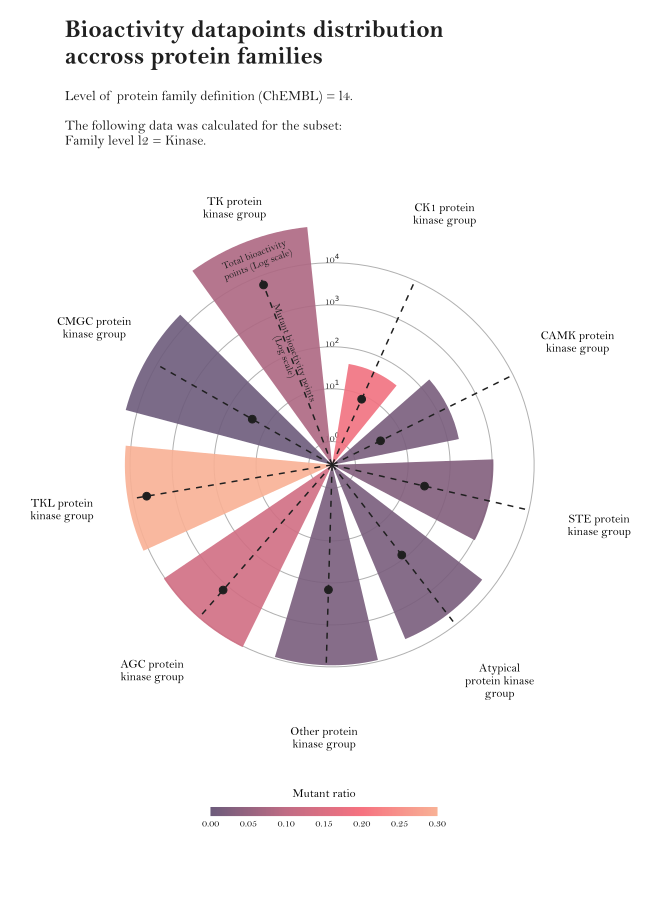

In [14]:
for figure_panel in [True,False]:
    figpath = plot_circular_barplot_families(annotated_data_families, 'l4', family_analysis_dir, subset_level='l2', subset_family='Kinase',
                                              save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                                            activity_mut  activity_all  \
l4                                                                       
Chemokine receptor                                   191          3391   
Lipid-like ligand receptor (family A GPCR)            31         13281   
Monoamine receptor                                   310         35427   
Neurotransmitter receptor (family C GPCR)             26          1527   
Nucleotide-like receptor (family A GPCR)             233         10208   
Other                                                 29          1054   
Short peptide receptor (family A GPCR)               910         31149   

                                            mut_ratio  
l4                                                     
Chemokine receptor                           0.056326  
Lipid-like ligand receptor (family A GPCR)   0.002334  
Monoamine receptor                           0.008750  
Neurotransmitter receptor (family C GPCR)    0.017027

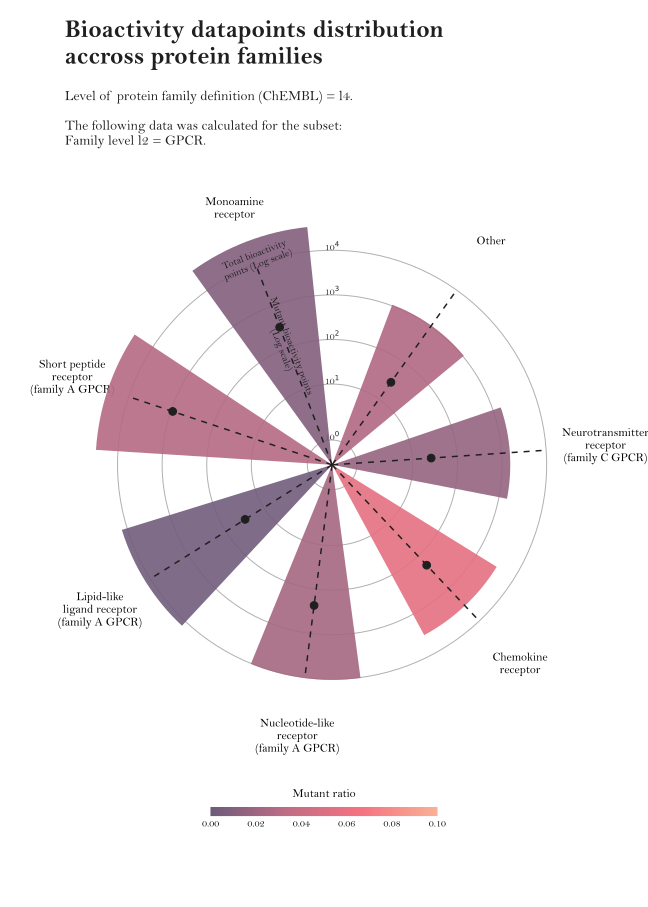

In [15]:
figpath = plot_circular_barplot_families(annotated_data_families, 'l4', family_analysis_dir, subset_level='l2', subset_family='GPCR',
                                          save=True, figure_panel=False)
display(SVG(data=figpath))

                                      activity_mut  activity_all  mut_ratio
l5                                                                         
Tyrosine protein kinase Abl family            1149          5079   0.226226
Tyrosine protein kinase Axl family               1           890   0.001124
Tyrosine protein kinase DDR family              26           284   0.091549
Tyrosine protein kinase EGFR family           2622         16066   0.163202
Tyrosine protein kinase Eph family               3           106   0.028302
Tyrosine protein kinase FGFR family            177          7748   0.022845
Tyrosine protein kinase Fak family              25          1620   0.015432
Tyrosine protein kinase JakB family            131          5989   0.021873
Tyrosine protein kinase Met family             129          4992   0.025841
Tyrosine protein kinase PDGFR family          1133          8186   0.138407
Tyrosine protein kinase Ret family             281          2123   0.132360
Tyrosine pro

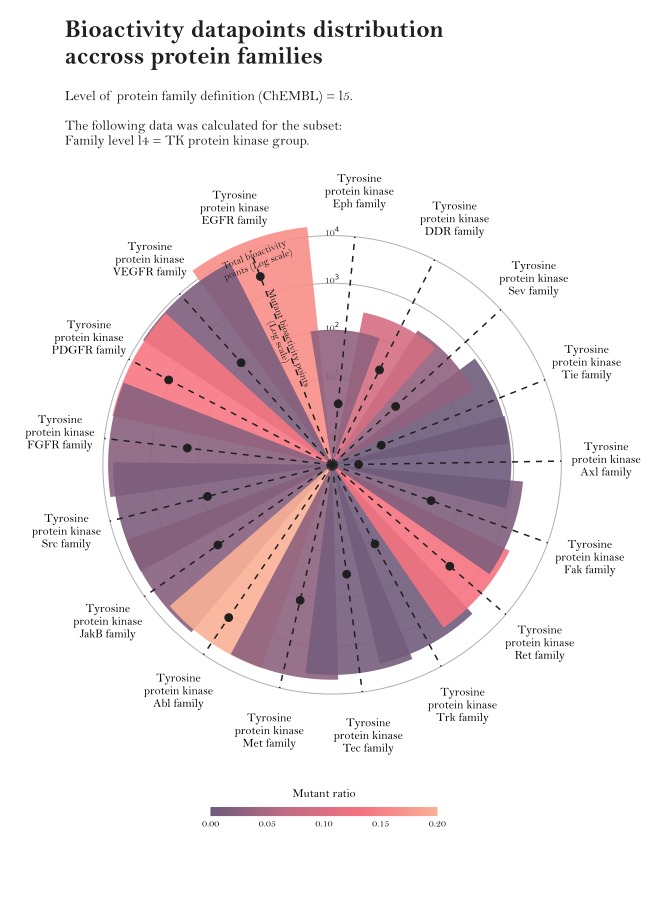

In [16]:
figpath = plot_circular_barplot_families(annotated_data_families, 'l5', family_analysis_dir, subset_level='l4', subset_family='TK protein kinase '
                                          'group', save=True)
display(SVG(data=figpath))

### Analysis of ChEMBL mutant annotation coverage per family

Read ChEMBL bioactivity data from annotation pipeline, containing new ("target_id") and old ("mutation") mutant
annotations.

In [17]:
# Read ChEMBL-only annotated bioactivity data for variants
chembl_annotated_data = chembl_annotation(chembl_version, annotation_round)
chembl_annotated_data

C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  


,target_id,chembl_id,assay_id,activity_id,accession,pchembl_value,activity_comment,canonical_smiles,mutation,year,sequence,pchembl_value_Mean,Activity_class
0,A0A024AXB9_WT,CHEMBL1230673,[1986298],[20667385],A0A024AXB9,[6.37],[nan],CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H](C)[C@H]1...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,6.370000,NaN
1,A0A024AXB9_WT,CHEMBL1332616,"[1986298, 1986301]","[20667410, 20667411]",A0A024AXB9,"[5.77, 6.22]","[nan, nan]",O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.995000,NaN
2,A0A024AXB9_WT,CHEMBL151,[1855280],[19053938],A0A024AXB9,[4.28],[nan],O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.280000,NaN
3,A0A024AXB9_WT,CHEMBL1535,[1986298],[20667415],A0A024AXB9,[4.04],[nan],CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.040000,NaN
4,A0A024AXB9_WT,CHEMBL164,"[1855280, 1855317, 1855317]","[19053935, 19053936, 19053937]",A0A024AXB9,"[4.66, 5.89, 6.1]","[nan, nan, nan]",O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.550000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870743,nan_WT,CHEMBL529,"[582849, 582849, 582849]","[2702686, 2702686, 2702686]",NaN,"[6.52, 6.52, 6.52]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.520000,NaN
1870744,nan_WT,CHEMBL532,"[576183, 576183, 576183, 576182, 576182, 57618...","[2663798, 2663798, 2663798, 2663799, 2663799, ...",NaN,"[7.54, 7.54, 7.54, 7.96, 7.96, 7.96, 5.72, 5.7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2007.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.418889,NaN
1870745,nan_WT,CHEMBL553222,"[582849, 582849, 582849]","[2702683, 2702683, 2702683]",NaN,"[7.0, 7.0, 7.0]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,7.000000,NaN
1870746,nan_WT,CHEMBL557931,"[582849, 582849, 582849]","[2702682, 2702682, 2702682]",NaN,"[5.89, 5.89, 5.89]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,5.890000,NaN


In [18]:
chembl_annotated_data_families = link_bioactivity_to_family(chembl_annotated_data, chembl_families)
chembl_annotated_data_families

,target_id,chembl_id,assay_id,activity_id,accession,pchembl_value,activity_comment,canonical_smiles,mutation,year,sequence,pchembl_value_Mean,Activity_class,l1,l2,l3,l4,l5
0,A0A024AXB9_WT,CHEMBL1230673,[1986298],[20667385],A0A024AXB9,[6.37],[nan],CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H](C)[C@H]1...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,6.370000,NaN,Other,Other,Other,Other,Other
1,A0A024AXB9_WT,CHEMBL1332616,"[1986298, 1986301]","[20667410, 20667411]",A0A024AXB9,"[5.77, 6.22]","[nan, nan]",O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.995000,NaN,Other,Other,Other,Other,Other
2,A0A024AXB9_WT,CHEMBL151,[1855280],[19053938],A0A024AXB9,[4.28],[nan],O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.280000,NaN,Other,Other,Other,Other,Other
3,A0A024AXB9_WT,CHEMBL1535,[1986298],[20667415],A0A024AXB9,[4.04],[nan],CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.040000,NaN,Other,Other,Other,Other,Other
4,A0A024AXB9_WT,CHEMBL164,"[1855280, 1855317, 1855317]","[19053935, 19053936, 19053937]",A0A024AXB9,"[4.66, 5.89, 6.1]","[nan, nan, nan]",O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.550000,NaN,Other,Other,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870743,nan_WT,CHEMBL529,"[582849, 582849, 582849]","[2702686, 2702686, 2702686]",NaN,"[6.52, 6.52, 6.52]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.520000,NaN,Other,Other,Other,Other,Other
1870744,nan_WT,CHEMBL532,"[576183, 576183, 576183, 576182, 576182, 57618...","[2663798, 2663798, 2663798, 2663799, 2663799, ...",NaN,"[7.54, 7.54, 7.54, 7.96, 7.96, 7.96, 5.72, 5.7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2007.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.418889,NaN,Other,Other,Other,Other,Other
1870745,nan_WT,CHEMBL553222,"[582849, 582849, 582849]","[2702683, 2702683, 2702683]",NaN,"[7.0, 7.0, 7.0]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,7.000000,NaN,Other,Other,Other,Other,Other
1870746,nan_WT,CHEMBL557931,"[582849, 582849, 582849]","[2702682, 2702682, 2702682]",NaN,"[5.89, 5.89, 5.89]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,5.890000,NaN,Other,Other,Other,Other,Other


Plot circular barplots

                      mut_new  mut_all  mut_ratio
l1                                               
Enzyme                 3631.0    20779   0.174744
Epigenetic regulator     70.0     1174   0.059625
Ion channel               6.0      250   0.024000
Membrane receptor       218.0     1758   0.124005
Other                    75.0      626   0.119808
Transcription factor     42.0      472   0.088983
Transporter               3.0      177   0.016949
Secreted protein          NaN       23   0.000000


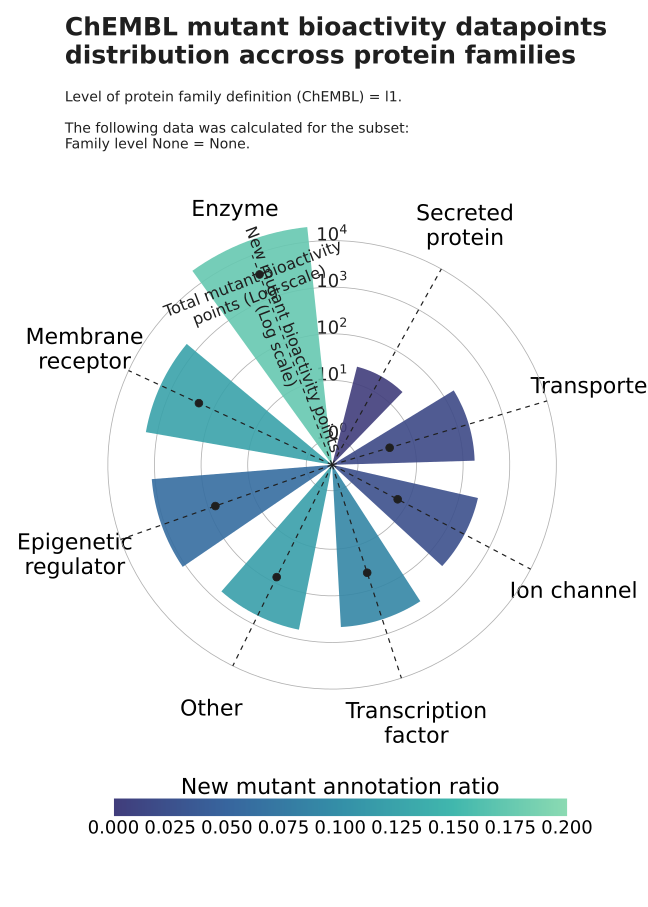

                      mut_new  mut_all  mut_ratio
l1                                               
Enzyme                 3631.0    20779   0.174744
Epigenetic regulator     70.0     1174   0.059625
Ion channel               6.0      250   0.024000
Membrane receptor       218.0     1758   0.124005
Other                    75.0      626   0.119808
Transcription factor     42.0      472   0.088983
Transporter               3.0      177   0.016949
Secreted protein          NaN       23   0.000000


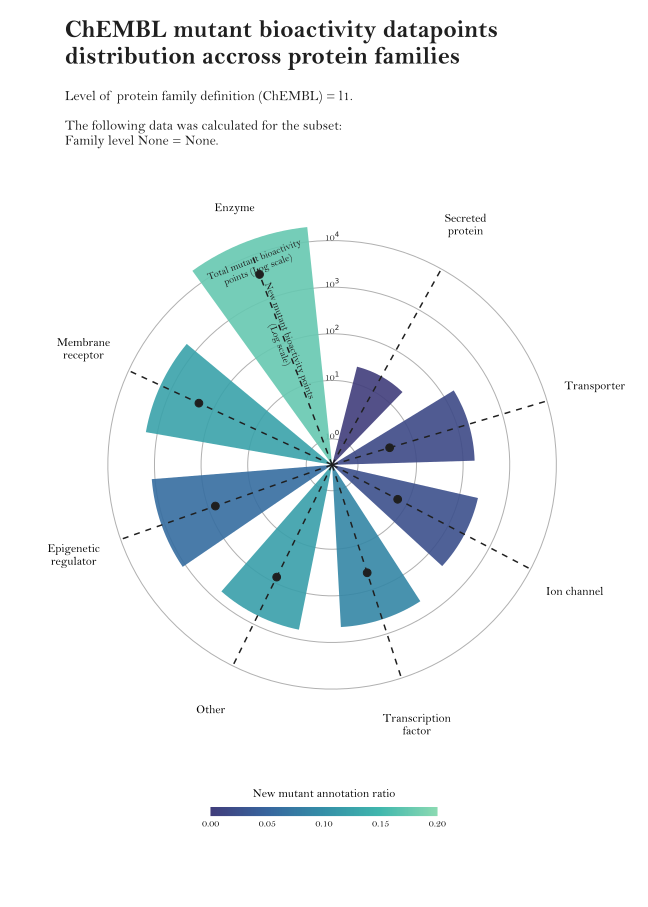

In [19]:
for figure_panel in [True,False]:
    figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l1', family_analysis_dir,
                                                             save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                             mut_new  mut_all  mut_ratio
l2                                                      
Eraser                           5.0       43   0.116279
GPCR                           218.0     1758   0.124005
Hydrolase                      303.0     3284   0.092266
Kinase                        2415.0    11879   0.203300
Nuclear receptor                42.0      366   0.114754
Other                          146.0     2233   0.065383
Oxidoreductase                 794.0     3111   0.255223
Phosphatase                     20.0       67   0.298507
Phosphodiesterase               16.0       53   0.301887
Protease                        50.0      909   0.055006
Reader                          10.0      817   0.012240
Transferase                     26.0      417   0.062350
Cytochrome P450                  NaN        4   0.000000
Electrochemical transporter      NaN      163   0.000000
Ligand-gated ion channel         NaN       73   0.000000
Lyase                          

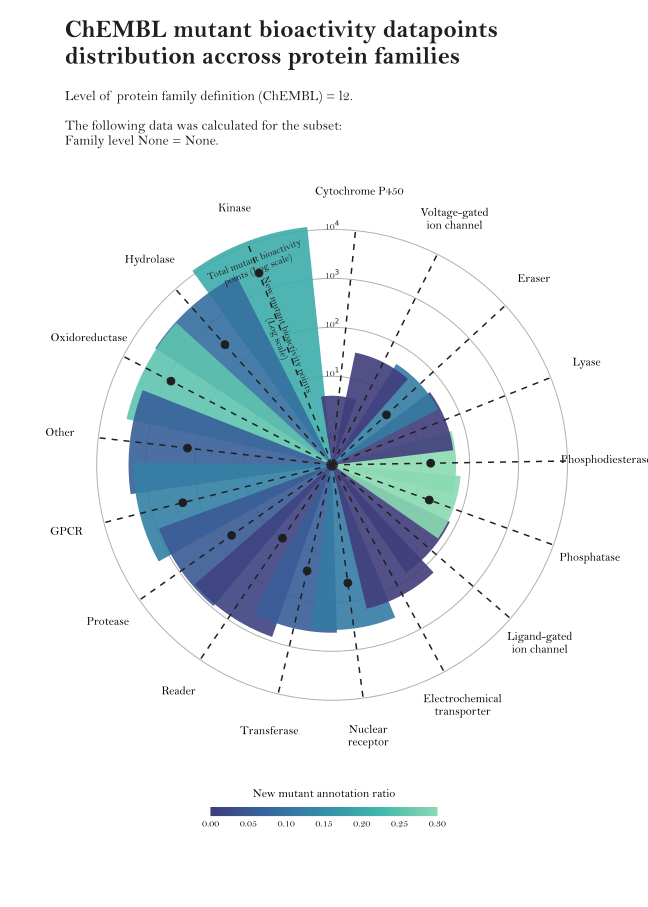

In [20]:
figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l2', family_analysis_dir,
                                              save=True)
display(SVG(data=figpath))

                               mut_new  mut_all  mut_ratio
l4                                                        
AGC protein kinase group        1302.0     1452   0.896694
CMGC protein kinase group          4.0       24   0.166667
Other protein kinase group         4.0      116   0.034483
TK protein kinase group          280.0     5473   0.051160
TKL protein kinase group         825.0     4695   0.175719
Atypical protein kinase group      NaN       80   0.000000
CAMK protein kinase group          NaN        3   0.000000
CK1 protein kinase group           NaN        8   0.000000
STE protein kinase group           NaN       28   0.000000


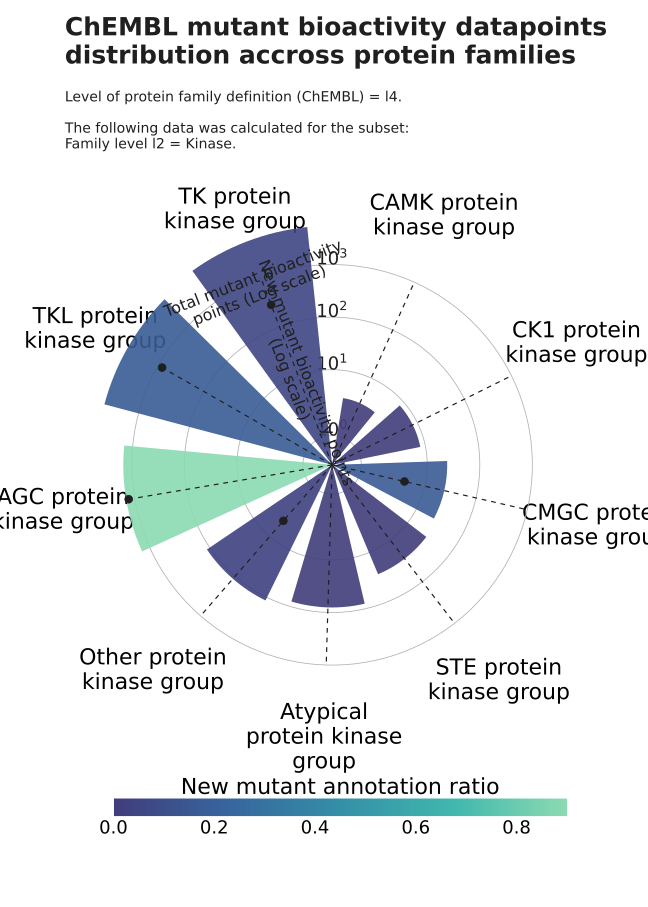

                               mut_new  mut_all  mut_ratio
l4                                                        
AGC protein kinase group        1302.0     1452   0.896694
CMGC protein kinase group          4.0       24   0.166667
Other protein kinase group         4.0      116   0.034483
TK protein kinase group          280.0     5473   0.051160
TKL protein kinase group         825.0     4695   0.175719
Atypical protein kinase group      NaN       80   0.000000
CAMK protein kinase group          NaN        3   0.000000
CK1 protein kinase group           NaN        8   0.000000
STE protein kinase group           NaN       28   0.000000


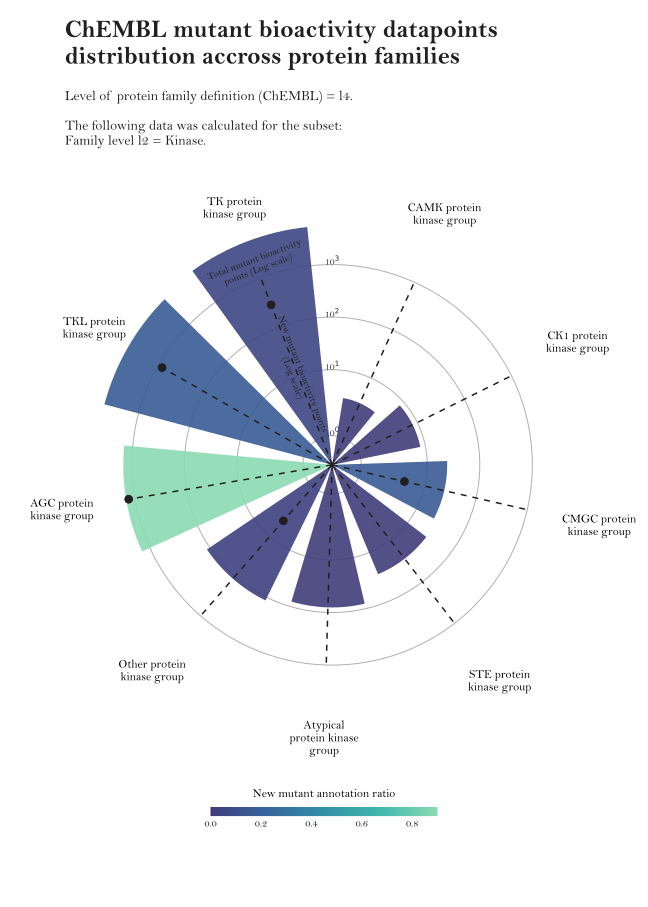

In [21]:
for figure_panel in [True,False]:
    figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l4', family_analysis_dir, subset_level='l2',
                                                            subset_family='Kinase', save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                                            mut_new  mut_all  mut_ratio
l4                                                                     
Monoamine receptor                             37.0      321   0.115265
Nucleotide-like receptor (family A GPCR)       43.0      233   0.184549
Short peptide receptor (family A GPCR)        138.0      927   0.148867
Chemokine receptor                              NaN      191   0.000000
Lipid-like ligand receptor (family A GPCR)      NaN       31   0.000000
Neurotransmitter receptor (family C GPCR)       NaN       26   0.000000
Other                                           NaN       29   0.000000


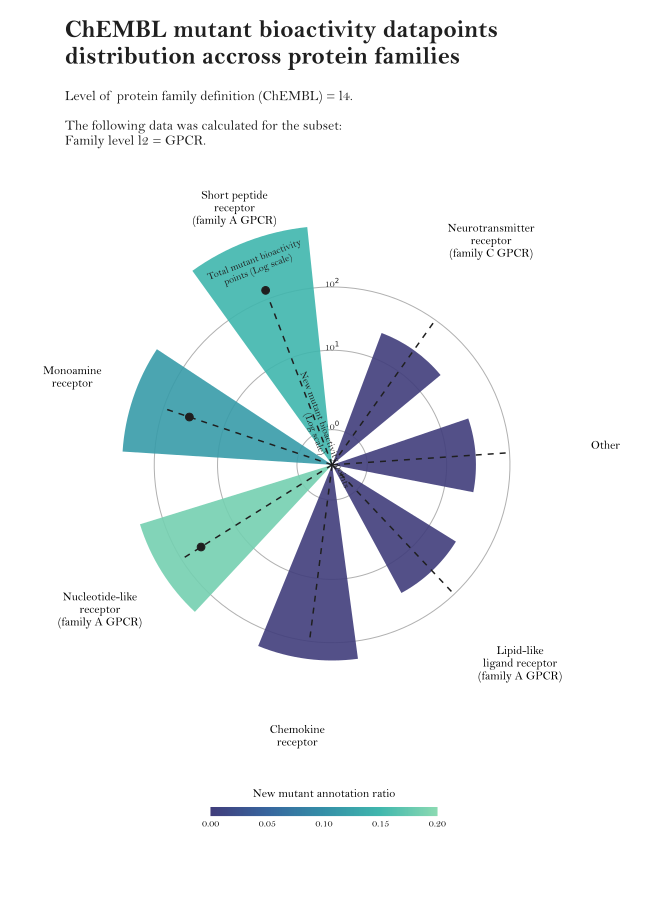

In [22]:
figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l4', family_analysis_dir, subset_level='l2',
                                                        subset_family='GPCR', save=True)
display(SVG(data=figpath))

                                      mut_new  mut_all  mut_ratio
l5                                                               
Tyrosine protein kinase Abl family       27.0      994   0.027163
Tyrosine protein kinase EGFR family     169.0     2547   0.066353
Tyrosine protein kinase FGFR family      46.0      145   0.317241
Tyrosine protein kinase Fak family       25.0       25   1.000000
Tyrosine protein kinase Ret family        3.0      255   0.011765
Tyrosine protein kinase Src family       10.0       77   0.129870
Tyrosine protein kinase Axl family        NaN        1   0.000000
Tyrosine protein kinase DDR family        NaN       26   0.000000
Tyrosine protein kinase Eph family        NaN        4   0.000000
Tyrosine protein kinase JakB family       NaN      131   0.000000
Tyrosine protein kinase Met family        NaN      115   0.000000
Tyrosine protein kinase PDGFR family      NaN      978   0.000000
Tyrosine protein kinase Sev family        NaN       10   0.000000
Tyrosine p

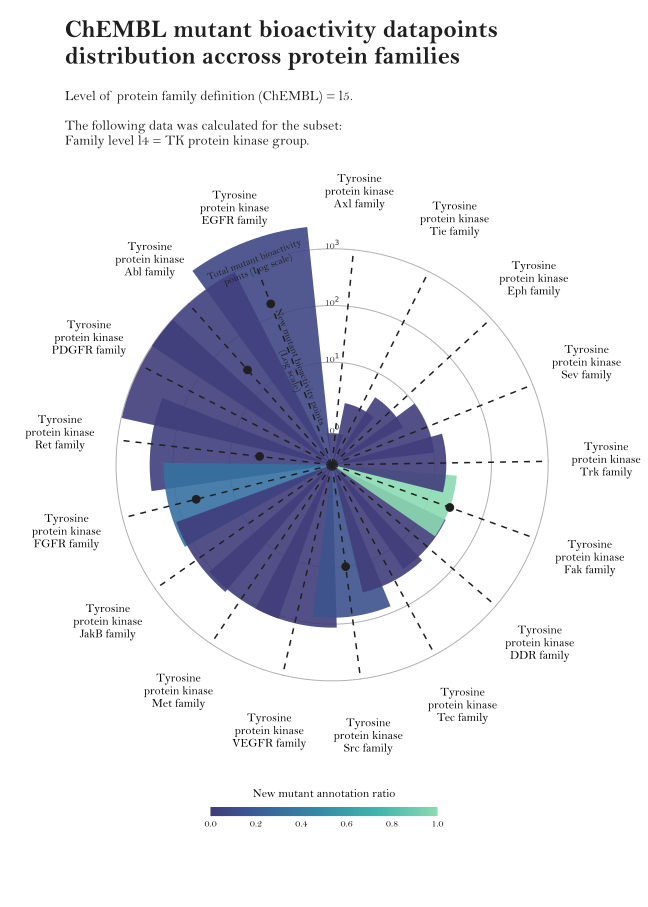

In [23]:
figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l5', family_analysis_dir, subset_level='l4',
                                                        subset_family='TK protein kinase group', save=True)
display(SVG(data=figpath))